In [3]:
from pprint import pprint
import os, json, sys

# import reframe test script:
sys.path.append('../reframe') # so that next line can find reframe itself ...
import reframe_imb

In [4]:
# find output files for this test:

def find_run_outputs(root='.', test=None, ext='.out'):
    """ Find files with a given extension within any output directory.
    
        Returns a sequence of paths.
    """
    
    # directory is soemthing like:
    # ../output/sausage-newslurm/compute/gnu8-openmpi3/IMB_MPI1Test/
    
    # TODO: use reframe/reframe/frontend/cli.py code to get the current system, something like
    # import reframe
    # import reframe.core.config as config
    # import reframe.core.runtime as runtime
    # import os

    # # assume default location!
    # print(reframe.INSTALL_PREFIX)
    # config_file = os.path.join(reframe.INSTALL_PREFIX, 'reframe/settings.py')
    # settings = config.load_settings_from_file(config_file)
    # runtime.init_runtime(settings.site_configuration, options.system,
    #                              non_default_craype=options.non_default_craype)
    
    results = []
    for (dirpath, dirnames, filenames) in os.walk(root):
        # in-place filter dirnames to avoid hidden directories:
        for idx, d in enumerate(dirnames):
            if d.startswith('.'):
                del dirnames[idx]
        for f in filenames:
            if os.path.splitext(f)[-1] == ext:
                path = os.path.join(dirpath, f)
                testdir = os.path.basename(os.path.dirname(path))
                if test is None or test in testdir:
                    results.append(path)
    return(results)
                
run_outputs = find_run_outputs('../output', 'IMB')
print(run_outputs)

['../output/sausage-newslurm/compute/gnu8-openmpi3/IMB_MPI1Test/rfm_IMB_MPI1Test_job.out']


In [5]:
# load results using the same function that we use for reframe performance tests:

results = []
for path in run_outputs:
    print('read', path)
    result = reframe_imb.read_imb_out(path)
    results.append(result)

read ../output/sausage-newslurm/compute/gnu8-openmpi3/IMB_MPI1Test/rfm_IMB_MPI1Test_job.out


In [6]:
# add metadata to results:

def parse_path(path):
    """ Return reframe info from a results path """
    parts = path.split(os.path.sep)
    #sysname, partition, environ, testname, filename = parts[-5:]
    COMPONENTS = ('sysname', 'partition', 'environ', 'testname', 'filename')
    info = dict(zip(COMPONENTS, parts[-5:]))
    return info    
    
for run in results:
    run['meta'] = parse_path(run['file'])

pprint(results)

[{'Biband': {'data': {'#bytes': [0,
                                 1,
                                 2,
                                 4,
                                 8,
                                 16,
                                 32,
                                 64,
                                 128,
                                 256,
                                 512,
                                 1024,
                                 2048,
                                 4096,
                                 8192,
                                 16384,
                                 32768,
                                 65536,
                                 131072,
                                 262144,
                                 524288,
                                 1048576,
                                 2097152,
                                 4194304],
                      '#repetitions': [1000,
                        

Text(0, 0.5, 'Mbytes/sec')

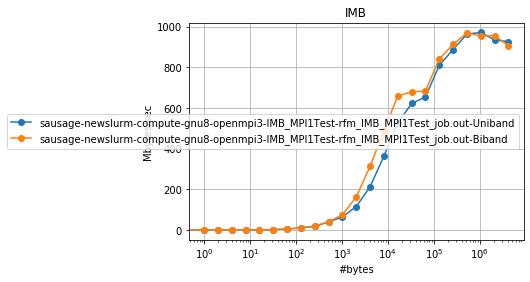

In [7]:
# Plotting

%matplotlib inline
import matplotlib.pyplot as plt

for run in results:
    for case in run: # e.g. Uniband
        if case in ('meta', 'file'): # TODO: be nice to get rid of this!
            continue
        data = run[case]['data']
        label = '-'.join(list(run['meta'].values()) + [case])
        plt.plot(data['#bytes'], data['Mbytes/sec'], 'o-', label=label)
plt.grid()
plt.title('IMB')
plt.legend()
plt.xscale('log')
plt.xlabel('#bytes')
plt.ylabel('Mbytes/sec')